# <center>Final Project Assignmen (Notebook)</center>
### <center>Cristian Yair Alvarado Elizalde</center>
### <center>Mario Alberto Mendoza Cuevas</center>

In [1]:
#Cristian Yair Alvarado Elizalde and Mario Alberto Mendoza 

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import*
from sklearn.model_selection import*
from time import time
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from time import time
from sklearn import metrics

In [2]:
data= pd.read_csv("data.csv")
data.columns = data.columns.str.replace(' ', '')
data.dataframeName = 'data.csv'
rows, columns = data.shape
print(f'The dataset has {rows} rows and {columns} columns')
print("In other words, a shape of -----> ", data.shape)

The dataset has 6819 rows and 96 columns
In other words, a shape of ----->  (6819, 96)


### Dataframe information 
#### (6819 rows × 96 columns)

In [3]:
data

,Bankrupt?,ROA(C)beforeinterestanddepreciationbeforeinterest,ROA(A)beforeinterestand%aftertax,ROA(B)beforeinterestanddepreciationaftertax,OperatingGrossMargin,RealizedSalesGrossMargin,OperatingProfitRate,Pre-taxnetInterestRate,After-taxnetInterestRate,Non-industryincomeandexpenditure/revenue,...,NetIncometoTotalAssets,TotalassetstoGNPprice,No-creditInterval,GrossProfittoSales,NetIncometoStockholder'sEquity,LiabilitytoEquity,DegreeofFinancialLeverage(DFL),InterestCoverageRatio(InterestexpensetoEBIT),NetIncomeFlag,EquitytoLiability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6814,0,0.493687,0.539468,0.543230,0.604455,0.604462,0.998992,0.797409,0.809331,0.303510,...,0.799927,0.000466,0.623620,0.604455,0.840359,0.279606,0.027064,0.566193,1,0.029890
6815,0,0.475162,0.538269,0.524172,0.598308,0.598308,0.998992,0.797414,0.809327,0.303520,...,0.799748,0.001959,0.623931,0.598306,0.840306,0.278132,0.027009,0.566018,1,0.038284
6816,0,0.472725,0.533744,0.520638,0.610444,0.610213,0.998984,0.797401,0.809317,0.303512,...,0.797778,0.002840,0.624156,0.610441,0.840138,0.275789,0.026791,0.565158,1,0.097649
6817,0,0.506264,0.559911,0.554045,0.607850,0.607850,0.999074,0.797500,0.809399,0.303498,...,0.811808,0.002837,0.623957,0.607846,0.841084,0.277547,0.026822,0.565302,1,0.044009


### Data Types for each of the columns in the dataframe
#### 96 Attributes (3 int64 and 93 float64)

In [4]:
print("-------------Data Types--------------")
data.info()

-------------Data Types--------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                             Non-Null Count  Dtype  
---  ------                                             --------------  -----  
 0   Bankrupt?                                          6819 non-null   int64  
 1   ROA(C)beforeinterestanddepreciationbeforeinterest  6819 non-null   float64
 2   ROA(A)beforeinterestand%aftertax                   6819 non-null   float64
 3   ROA(B)beforeinterestanddepreciationaftertax        6819 non-null   float64
 4   OperatingGrossMargin                               6819 non-null   float64
 5   RealizedSalesGrossMargin                           6819 non-null   float64
 6   OperatingProfitRate                                6819 non-null   float64
 7   Pre-taxnetInterestRate                             6819 non-null   float64
 8   After-taxnetInterestRate                          

### Check if we have "Missing Data"

#### No Missing Data in the Dataset

In [5]:
data.isnull().sum()

Bankrupt?                                            0
ROA(C)beforeinterestanddepreciationbeforeinterest    0
ROA(A)beforeinterestand%aftertax                     0
ROA(B)beforeinterestanddepreciationaftertax          0
OperatingGrossMargin                                 0
                                                    ..
LiabilitytoEquity                                    0
DegreeofFinancialLeverage(DFL)                       0
InterestCoverageRatio(InterestexpensetoEBIT)         0
NetIncomeFlag                                        0
EquitytoLiability                                    0
Length: 96, dtype: int64

In [6]:
data.duplicated().sum()

0

## Target (Bankrupt)

-----------------Counting Bankrupt Values--------------------

0    6599
1     220
Name: Bankrupt?, dtype: int64


Text(0.5, 1.0, 'There was Bankruptcy')

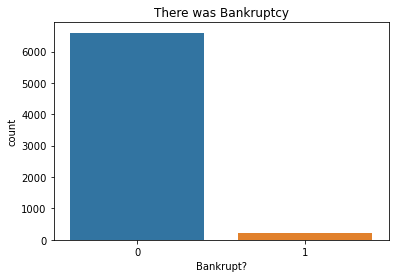

In [7]:
print("-----------------Counting Bankrupt Values--------------------")
print("")
print(data['Bankrupt?'].value_counts())
sns.countplot(x=data['Bankrupt?'])
plt.title('There was Bankruptcy')

0    6599
1     220
Name: Bankrupt?, dtype: int64


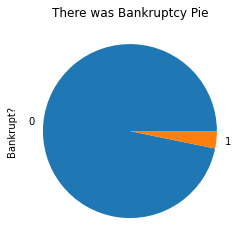

In [8]:
print(data['Bankrupt?'].value_counts())
data['Bankrupt?'].value_counts(normalize=True).plot.pie()
plt.title('There was Bankruptcy Pie')
plt.show()

# Deal with Imblance Data (In a simple way)

In [9]:
from sklearn.utils import resample
# Separate majority and minority classes

df_majority = data[data['Bankrupt?'] == 0]
df_minority = data[data['Bankrupt?'] == 1]
 
# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,     # sample with replacement
                                 n_samples=6599,    # to match majority class
                                 random_state=220) # reproducible results
 
# Combine majority class with upsampled minority class
data = pd.concat([df_majority, df_minority_upsampled])
 
# Display new class counts
print(data['Bankrupt?'].value_counts())

0    6599
1    6599
Name: Bankrupt?, dtype: int64


0    6599
1    6599
Name: Bankrupt?, dtype: int64


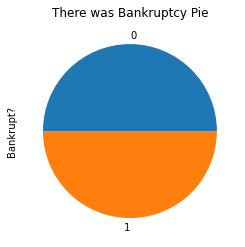

In [10]:
print(data['Bankrupt?'].value_counts())
data['Bankrupt?'].value_counts(normalize=True).plot.pie()
plt.title('There was Bankruptcy Pie')
plt.show()

## Correlation Analisis

### Using Correlation Matrix

In [11]:
data[['No-creditInterval', 'NetIncometoTotalAssets', 'Revenueperperson',
      'Totaldebt/Totalnetworth', 'Pre-taxnetInterestRate', 'After-taxnetInterestRate']].corr()

,No-creditInterval,NetIncometoTotalAssets,Revenueperperson,Totaldebt/Totalnetworth,Pre-taxnetInterestRate,After-taxnetInterestRate
No-creditInterval,1.000000,0.018272,0.262746,0.003562,-0.018465,-0.052000
NetIncometoTotalAssets,0.018272,1.000000,-0.006191,0.000540,0.060288,0.054743
Revenueperperson,0.262746,-0.006191,1.000000,-0.002295,-0.136601,-0.251110
Totaldebt/Totalnetworth,0.003562,0.000540,-0.002295,1.000000,-0.000106,0.000496
Pre-taxnetInterestRate,-0.018465,0.060288,-0.136601,-0.000106,1.000000,0.979735
After-taxnetInterestRate,-0.052000,0.054743,-0.251110,0.000496,0.979735,1.000000


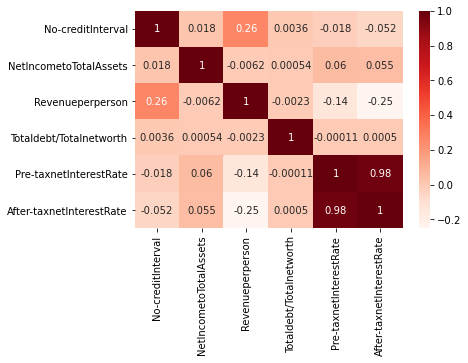

In [12]:
sns.heatmap(data[['No-creditInterval', 'NetIncometoTotalAssets', 'Revenueperperson',
      'Totaldebt/Totalnetworth', 'Pre-taxnetInterestRate', 'After-taxnetInterestRate']].corr(), annot=True, cmap = 'Reds')
plt.show()

### Numeric-categorical analysis

In [13]:
#Numeric-categorical analysis (For each of the previous numerical attributes vs  Bankrupt )

print("-----------Considering the mean----------------")
print("")
print(data.groupby('Bankrupt?')['No-creditInterval'].mean()) 
print("")
print(data.groupby('Bankrupt?')['NetIncometoTotalAssets'].mean()) 
print("")
print(data.groupby('Bankrupt?')['Revenueperperson'].mean()) 
print("")
print(data.groupby('Bankrupt?')['Totaldebt/Totalnetworth'].mean()) 
print("")
print(data.groupby('Bankrupt?')['Pre-taxnetInterestRate'].mean()) 
print("")
print(data.groupby('Bankrupt?')['After-taxnetInterestRate'].mean()) 
print("")


print("-----------Considering the median----------------")
print("")
print(data.groupby('Bankrupt?')['No-creditInterval'].median()) 
print("")
print(data.groupby('Bankrupt?')['NetIncometoTotalAssets'].median()) 
print("")
print(data.groupby('Bankrupt?')['Revenueperperson'].median()) 
print("")
print(data.groupby('Bankrupt?')['Totaldebt/Totalnetworth'].median()) 
print("")
print(data.groupby('Bankrupt?')['Pre-taxnetInterestRate'].median()) 
print("")
print(data.groupby('Bankrupt?')['After-taxnetInterestRate'].median()) 
print("")

-----------Considering the mean----------------

Bankrupt?
0    0.623927
1    0.623591
Name: No-creditInterval, dtype: float64

Bankrupt?
0    0.810083
1    0.737846
Name: NetIncometoTotalAssets, dtype: float64

Bankrupt?
0    1.335051e+06
1    3.311865e+07
Name: Revenueperperson, dtype: float64

Bankrupt?
0    4.037733e+06
1    1.419761e+07
Name: Totaldebt/Totalnetworth, dtype: float64

Bankrupt?
0    0.797210
1    0.796584
Name: Pre-taxnetInterestRate, dtype: float64

Bankrupt?
0    0.809106
1    0.808414
Name: After-taxnetInterestRate, dtype: float64

-----------Considering the median----------------

Bankrupt?
0    0.623887
1    0.623540
Name: No-creditInterval, dtype: float64

Bankrupt?
0    0.811492
1    0.766274
Name: NetIncometoTotalAssets, dtype: float64

Bankrupt?
0    0.018539
1    0.020340
Name: Revenueperperson, dtype: float64

Bankrupt?
0    0.005377
1    0.015879
Name: Totaldebt/Totalnetworth, dtype: float64

Bankrupt?
0    0.797468
1    0.797151
Name: Pre-taxnetInterest

----------Ploting the box-plots---------------


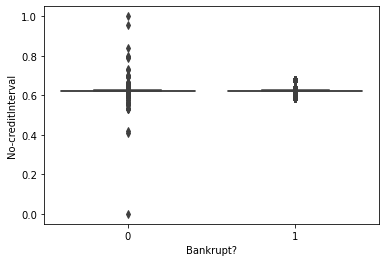

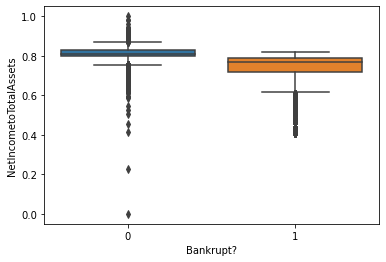

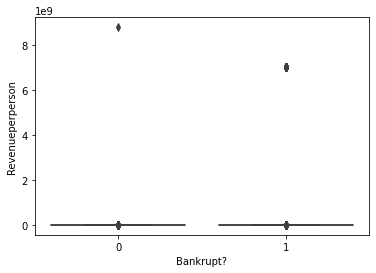

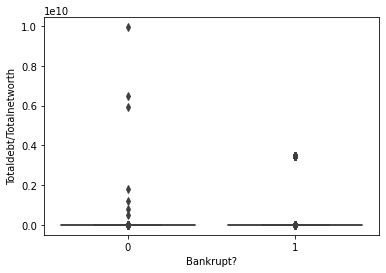

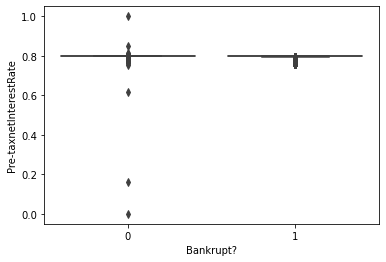

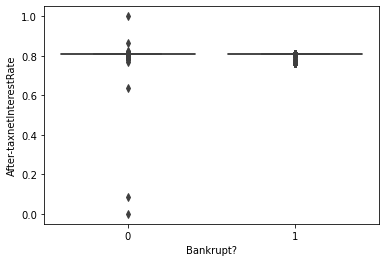

In [14]:
import warnings
warnings.filterwarnings("ignore")

print("----------Ploting the box-plots---------------")

sns.boxplot(data['Bankrupt?'], data['No-creditInterval'])
plt.show()

sns.boxplot(data['Bankrupt?'], data['NetIncometoTotalAssets'])
plt.show()

sns.boxplot(data['Bankrupt?'], data['Revenueperperson'])
plt.show()

sns.boxplot(data['Bankrupt?'], data['Totaldebt/Totalnetworth'])
plt.show()

sns.boxplot(data['Bankrupt?'], data['Pre-taxnetInterestRate'])
plt.show()

sns.boxplot(data['Bankrupt?'], data['After-taxnetInterestRate'])
plt.show()


# Modeling

### Preprocessing

In [15]:
from sklearn.preprocessing import StandardScaler
# Separating out the features
X = data.iloc[:,1:69].values
# Separating out the target
y = data.iloc[:,0]

### 1) Model: Logistic Regression

In [16]:
from sklearn.linear_model import LogisticRegression #Library for Using Logistic Regression.

print("===========================================================")
print("                Logistic Regression                        ")
print("===========================================================")


start_time = time()
#------------------Logistic Regression------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = LogisticRegression(solver='liblinear') #I used liblinear because is the solver that gives me better results.
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

try:
    score = roc_auc_score(y_test, y_pred)
except ValueError:
    score = 0
    pass

elapsed_time = time() - start_time
#-------------------------------------------------------------------------------
accuracy = metrics.accuracy_score(y_test, y_pred) 
f1 = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
#-------------------------------------------------------------------------------
print("-------------------------------------------")
print ("Score(AUC): ",score)
print("Elapsed time: %0.10f seconds." % elapsed_time)
print("-------------------------------------------")
print("Accuracy:\t %s"%accuracy)
print("F1-Score:\t %s"%f1)
print("Precision:\t %s"%precision)
print("Recall:\t\t %s"%recall)
print("-------------------------------------------")
confMatrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix showing the TP, FP, TN, and FN:")
print(confMatrix)

                Logistic Regression                        
-------------------------------------------
Score(AUC):  0.9166666666666667
Elapsed time: 0.7947158813 seconds.
-------------------------------------------
Accuracy:	 0.88
F1-Score:	 0.8235294117647058
Precision:	 0.7
Recall:		 1.0
-------------------------------------------
Confusion matrix showing the TP, FP, TN, and FN:
[[15  3]
 [ 0  7]]


### 2) Model: Random Forest

In [17]:
from sklearn.ensemble import RandomForestClassifier #Library for use Random Forest

print("===========================================================")
print("                Random Forest Classifier                   ")
print("===========================================================")

start_time = time()
#--------------------- Random Forest -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = RandomForestClassifier(max_depth=3,random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  

try:
    score = roc_auc_score(y_test, y_pred)
except ValueError:
    score = 0
    pass

elapsed_time = time() - start_time
#-------------------------------------------------------------------------------
accuracy = metrics.accuracy_score(y_test, y_pred) 
f1 = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
#-------------------------------------------------------------------------------
print("-------------------------------------------")
print ("Score(AUC): ",score)
print("Elapsed time: %0.10f seconds." % elapsed_time)
print("-------------------------------------------")
print("Accuracy:\t %s"%accuracy)
print("F1-Score:\t %s"%f1)
print("Precision:\t %s"%precision)
print("Recall:\t\t %s"%recall)
print("-------------------------------------------")
confMatrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix showing the TP, FP, TN, and FN:")
print(confMatrix)

                Random Forest Classifier                   
-------------------------------------------
Score(AUC):  0.9230769230769231
Elapsed time: 2.7080509663 seconds.
-------------------------------------------
Accuracy:	 0.92
F1-Score:	 0.9166666666666666
Precision:	 1.0
Recall:		 0.8461538461538461
-------------------------------------------
Confusion matrix showing the TP, FP, TN, and FN:
[[12  0]
 [ 2 11]]


### 3) Model: SVM (Support Vector Machines)

In [18]:
from sklearn import svm


print("===========================================================")
print("                     SVM Classifier                        ")
print("===========================================================")


start_time = time()
#------------------Support Vector Machines (SVM)---------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  
try:
    score = roc_auc_score(y_test, y_pred)
except ValueError:
    score = 0
    pass
elapsed_time = time() - start_time
#-------------------------------------------------------------------------------
accuracy = metrics.accuracy_score(y_test, y_pred) 
f1 = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
#-------------------------------------------------------------------------------
print("-------------------------------------------")
print ("Score(AUC): ",score)
print("Elapsed time: %0.10f seconds." % elapsed_time)
print("-------------------------------------------")
print("Accuracy:\t %s"%accuracy)
print("F1-Score:\t %s"%f1)
print("Precision:\t %s"%precision)
print("Recall:\t\t %s"%recall)
print("-------------------------------------------")
confMatrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix showing the TP, FP, TN, and FN:")
print(confMatrix)

                     SVM Classifier                        
-------------------------------------------
Score(AUC):  0.9545454545454545
Elapsed time: 8.7181220055 seconds.
-------------------------------------------
Accuracy:	 0.96
F1-Score:	 0.9655172413793104
Precision:	 0.9333333333333333
Recall:		 1.0
-------------------------------------------
Confusion matrix showing the TP, FP, TN, and FN:
[[10  1]
 [ 0 14]]


### 4) Model: KNN (K-Nearest Neighbors)

In [19]:
from sklearn.neighbors import KNeighborsClassifier

print("===========================================================")
print("                    KNN Classifier                         ")
print("===========================================================")


start_time = time()
#------------------Support Vector Machines (SVM)---------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  
try:
    score = roc_auc_score(y_test, y_pred)
except ValueError:
    score = 0
    pass
elapsed_time = time() - start_time
#-------------------------------------------------------------------------------
accuracy = metrics.accuracy_score(y_test, y_pred) 
f1 = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
#-------------------------------------------------------------------------------
print("-------------------------------------------")
print ("Score(AUC): ",score)
print("Elapsed time: %0.10f seconds." % elapsed_time)
print("-------------------------------------------")
print("Accuracy:\t %s"%accuracy)
print("F1-Score:\t %s"%f1)
print("Precision:\t %s"%precision)
print("Recall:\t\t %s"%recall)
print("-------------------------------------------")
confMatrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix showing the TP, FP, TN, and FN:")
print(confMatrix)



                    KNN Classifier                         
-------------------------------------------
Score(AUC):  1.0
Elapsed time: 0.0858037472 seconds.
-------------------------------------------
Accuracy:	 1.0
F1-Score:	 1.0
Precision:	 1.0
Recall:		 1.0
-------------------------------------------
Confusion matrix showing the TP, FP, TN, and FN:
[[10  0]
 [ 0 15]]


### 5) Model: Gaussian Naive Bayes

In [20]:
from sklearn.naive_bayes import GaussianNB

print("===========================================================")
print("                    Gaussian Naive Bayes                   ")
print("===========================================================")


start_time = time()
#------------------Support Vector Machines (SVM)---------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  
try:
    score = roc_auc_score(y_test, y_pred)
except ValueError:
    score = 0
    pass
elapsed_time = time() - start_time
#-------------------------------------------------------------------------------
accuracy = metrics.accuracy_score(y_test, y_pred) 
f1 = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
#-------------------------------------------------------------------------------
print("-------------------------------------------")
print ("Score(AUC): ",score)
print("Elapsed time: %0.10f seconds." % elapsed_time)
print("-------------------------------------------")
print("Accuracy:\t %s"%accuracy)
print("F1-Score:\t %s"%f1)
print("Precision:\t %s"%precision)
print("Recall:\t\t %s"%recall)
print("-------------------------------------------")
confMatrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix showing the TP, FP, TN, and FN:")
print(confMatrix)


                    Gaussian Naive Bayes                   
-------------------------------------------
Score(AUC):  0.46691176470588236
Elapsed time: 0.1223413944 seconds.
-------------------------------------------
Accuracy:	 0.32
F1-Score:	 0.4516129032258065
Precision:	 0.30434782608695654
Recall:		 0.875
-------------------------------------------
Confusion matrix showing the TP, FP, TN, and FN:
[[ 1 16]
 [ 1  7]]


##  Using PCA with the same algorithms

In [21]:
from sklearn.decomposition import PCA


# Separating out the features
X = data.iloc[:,1::].values
# Separating out the target
y = data.iloc[:,0]

pca = PCA(n_components = 8)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents)
X = data.iloc[:,1::].values
# Separating out the target
y = data.iloc[:,0]


principalDf 

,0,1,2,3,4,5,6,7
0,4.187646e+09,1.630964e+09,-2.353946e+09,-1.193488e+09,-2.219714e+09,-1.694842e+09,-4.604295e+09,2.862694e+09
1,8.523780e+09,-4.762293e+09,2.487680e+09,1.942631e+08,-1.514718e+09,-1.815623e+09,2.614774e+09,-5.716389e+08
2,4.054898e+09,1.223658e+09,-1.958873e+09,-6.803388e+07,-3.635323e+09,-3.406486e+09,-4.159862e+09,3.833642e+09
3,4.184324e+09,-4.102773e+09,1.041518e+09,2.405198e+08,-2.193257e+09,-1.069363e+09,1.887218e+09,-5.340523e+08
4,1.111673e+09,-1.231104e+09,-3.035788e+09,-4.455422e+08,-4.284650e+09,3.533753e+09,1.746034e+09,3.146172e+08
...,...,...,...,...,...,...,...,...
13193,-3.144347e+09,-1.906885e+08,-3.041611e+09,3.506611e+09,3.364797e+09,-1.041451e+09,2.088547e+09,3.180557e+09
13194,-4.526051e+08,-5.647317e+09,2.999191e+09,-1.960905e+08,3.183188e+08,1.668636e+08,-8.000031e+08,-6.567278e+08
13195,3.683619e+09,7.266663e+09,1.730230e+09,-2.960457e+09,-1.669626e+09,4.090400e+09,-5.563042e+09,-2.017960e+09
13196,-2.927617e+09,-6.306066e+08,-2.822231e+09,-3.338793e+09,1.921348e+09,5.772489e+09,5.073282e+08,2.049461e+09


### 1) Model: Logistic Regression

In [22]:
from sklearn.linear_model import LogisticRegression #Library for Using Logistic Regression.

print("===========================================================")
print("                Logistic Regression                        ")
print("===========================================================")


start_time = time()
#------------------Logistic Regression------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = LogisticRegression(solver='liblinear') #I used liblinear because is the solver that gives me better results.
model.fit(X_train, y_train)
y_pred = model.predict(X_test) 

try:
    score = roc_auc_score(y_test, y_pred)
except ValueError:
    score = 0
    pass

elapsed_time = time() - start_time
#-------------------------------------------------------------------------------
accuracy = metrics.accuracy_score(y_test, y_pred) 
f1 = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
#-------------------------------------------------------------------------------
print("-------------------------------------------")
print ("Score(AUC): ",score)
print("Elapsed time: %0.10f seconds." % elapsed_time)
print("-------------------------------------------")
print("Accuracy:\t %s"%accuracy)
print("F1-Score:\t %s"%f1)
print("Precision:\t %s"%precision)
print("Recall:\t\t %s"%recall)
print("-------------------------------------------")
confMatrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix showing the TP, FP, TN, and FN:")
print(confMatrix)

                Logistic Regression                        
-------------------------------------------
Score(AUC):  0.9583333333333333
Elapsed time: 2.1761372089 seconds.
-------------------------------------------
Accuracy:	 0.96
F1-Score:	 0.962962962962963
Precision:	 0.9285714285714286
Recall:		 1.0
-------------------------------------------
Confusion matrix showing the TP, FP, TN, and FN:
[[11  1]
 [ 0 13]]


### 2) Model: Random Forest

In [23]:
from sklearn.ensemble import RandomForestClassifier #Library for use Random Forest

print("===========================================================")
print("                Random Forest Classifier                   ")
print("===========================================================")

start_time = time()
#--------------------- Random Forest -------------------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = RandomForestClassifier(max_depth=3,random_state=1)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  

try:
    score = roc_auc_score(y_test, y_pred)
except ValueError:
    score = 0
    pass

elapsed_time = time() - start_time
#-------------------------------------------------------------------------------
accuracy = metrics.accuracy_score(y_test, y_pred) 
f1 = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
#-------------------------------------------------------------------------------
print("-------------------------------------------")
print ("Score(AUC): ",score)
print("Elapsed time: %0.10f seconds." % elapsed_time)
print("-------------------------------------------")
print("Accuracy:\t %s"%accuracy)
print("F1-Score:\t %s"%f1)
print("Precision:\t %s"%precision)
print("Recall:\t\t %s"%recall)
print("-------------------------------------------")
confMatrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix showing the TP, FP, TN, and FN:")
print(confMatrix)

                Random Forest Classifier                   
-------------------------------------------
Score(AUC):  0.8333333333333334
Elapsed time: 3.3869953156 seconds.
-------------------------------------------
Accuracy:	 0.84
F1-Score:	 0.8000000000000002
Precision:	 0.8
Recall:		 0.8
-------------------------------------------
Confusion matrix showing the TP, FP, TN, and FN:
[[13  2]
 [ 2  8]]


### 3) Model: SVM (Support Vector Machines)

In [24]:
from sklearn import svm


print("===========================================================")
print("                     SVM Classifier                        ")
print("===========================================================")


start_time = time()
#------------------Support Vector Machines (SVM)---------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = svm.SVC()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  
try:
    score = roc_auc_score(y_test, y_pred)
except ValueError:
    score = 0
    pass
elapsed_time = time() - start_time
#-------------------------------------------------------------------------------
accuracy = metrics.accuracy_score(y_test, y_pred) 
f1 = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
#-------------------------------------------------------------------------------
print("-------------------------------------------")
print ("Score(AUC): ",score)
print("Elapsed time: %0.10f seconds." % elapsed_time)
print("-------------------------------------------")
print("Accuracy:\t %s"%accuracy)
print("F1-Score:\t %s"%f1)
print("Precision:\t %s"%precision)
print("Recall:\t\t %s"%recall)
print("-------------------------------------------")
confMatrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix showing the TP, FP, TN, and FN:")
print(confMatrix)

                     SVM Classifier                        
-------------------------------------------
Score(AUC):  0.9666666666666667
Elapsed time: 10.9490025043 seconds.
-------------------------------------------
Accuracy:	 0.96
F1-Score:	 0.9523809523809523
Precision:	 0.9090909090909091
Recall:		 1.0
-------------------------------------------
Confusion matrix showing the TP, FP, TN, and FN:
[[14  1]
 [ 0 10]]


### 4) Model: KNN (K-Nearest Neighbors)

In [25]:
from sklearn.neighbors import KNeighborsClassifier

print("===========================================================")
print("                     KNN Classifier:                       ")
print("===========================================================")


start_time = time()
#------------------Support Vector Machines (SVM)---------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = KNeighborsClassifier(n_neighbors=5)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  
try:
    score = roc_auc_score(y_test, y_pred)
except ValueError:
    score = 0
    pass
elapsed_time = time() - start_time
#-------------------------------------------------------------------------------
accuracy = metrics.accuracy_score(y_test, y_pred) 
f1 = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
#-------------------------------------------------------------------------------
print("-------------------------------------------")
print ("Score(AUC): ",score)
print("Elapsed time: %0.10f seconds." % elapsed_time)
print("-------------------------------------------")
print("Accuracy:\t %s"%accuracy)
print("F1-Score:\t %s"%f1)
print("Precision:\t %s"%precision)
print("Recall:\t\t %s"%recall)
print("-------------------------------------------")
confMatrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix showing the TP, FP, TN, and FN:")
print(confMatrix)



                     KNN Classifier:                       
-------------------------------------------
Score(AUC):  0.8888888888888888
Elapsed time: 0.1034388542 seconds.
-------------------------------------------
Accuracy:	 0.92
F1-Score:	 0.9411764705882353
Precision:	 0.8888888888888888
Recall:		 1.0
-------------------------------------------
Confusion matrix showing the TP, FP, TN, and FN:
[[ 7  2]
 [ 0 16]]


### 5) Model: Gaussian Naive Bayes

In [26]:
from sklearn.naive_bayes import GaussianNB

print("===========================================================")
print("                    Gaussian Naive Bayes                   ")
print("===========================================================")


start_time = time()
#------------------Support Vector Machines (SVM)---------------------------------
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 25)
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

model = GaussianNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)  
try:
    score = roc_auc_score(y_test, y_pred)
except ValueError:
    score = 0
    pass
elapsed_time = time() - start_time
#-------------------------------------------------------------------------------
accuracy = metrics.accuracy_score(y_test, y_pred) 
f1 = metrics.f1_score(y_test, y_pred)
precision = metrics.precision_score(y_test, y_pred)
recall = metrics.recall_score(y_test, y_pred)
#-------------------------------------------------------------------------------
print("-------------------------------------------")
print ("Score(AUC): ",score)
print("Elapsed time: %0.10f seconds." % elapsed_time)
print("-------------------------------------------")
print("Accuracy:\t %s"%accuracy)
print("F1-Score:\t %s"%f1)
print("Precision:\t %s"%precision)
print("Recall:\t\t %s"%recall)
print("-------------------------------------------")
confMatrix = metrics.confusion_matrix(y_test, y_pred)
print("Confusion matrix showing the TP, FP, TN, and FN:")
print(confMatrix)


                    Gaussian Naive Bayes                   
-------------------------------------------
Score(AUC):  0.75
Elapsed time: 0.1381185055 seconds.
-------------------------------------------
Accuracy:	 0.68
F1-Score:	 0.6923076923076924
Precision:	 0.5294117647058824
Recall:		 1.0
-------------------------------------------
Confusion matrix showing the TP, FP, TN, and FN:
[[8 8]
 [0 9]]
